# Regresión lineal:

### Vamos a realizar un modelo de machine learning para predecir el precio de una casa en función de su tamaño y número de habitaciones.

### El conjunto de datos "Boston Housing", que es comúnmente utilizado en problemas de regresión. No es exactamente sobre incidentes de seguridad, pero es suficientemente parecido para nuestro ejercicio. Este conjunto de datos está disponible en el repositorio de Machine Learning de UCI.

In [10]:
# Importamos las librerías necesarias:

import pandas as pd

# Definimos la URL de los datos:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

# Definimos los nombres de las columnas:

columnas = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Cargar el conjunto de datos
df = pd.read_csv(url, delim_whitespace=True, names=columnas)

# Echar un vistazo a las primeras filas del conjunto de datos
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


### Este código descarga los datos directamente desde el repositorio de UCI y los carga en un DataFrame de pandas. La opción delim_whitespace=True se utiliza porque este archivo en particular utiliza espacios en blanco en lugar de comas para separar los valores. También definimos los nombres de las columnas porque no están incluidos en el archivo.

### Análisis exploratorio de datos y preprocesamiento:

### En esta etapa, lo que queremos es entender mejor nuestros datos. Algunas de las preguntas que podríamos tener en mente incluyen:

### ¿Faltan valores en los datos?
### ¿Hay alguna característica categórica que necesite ser codificada de manera diferente?
### ¿Existen posibles correlaciones entre las características que podríamos aprovechar?

In [11]:
# Verificamos si hay valores nulos:

print(df.isnull().sum())

# Verificamos las estadisticas de los datos:

print(df.describe())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO          

### Este código primero verifica si hay algún valor faltante en los datos, lo cual es importante porque algunos algoritmos de machine learning no pueden manejar valores faltantes.

### Luego, imprime estadísticas descriptivas de los datos, como la media, el valor mínimo y máximo, etc. Esto nos ayuda a entender la distribución de los datos.

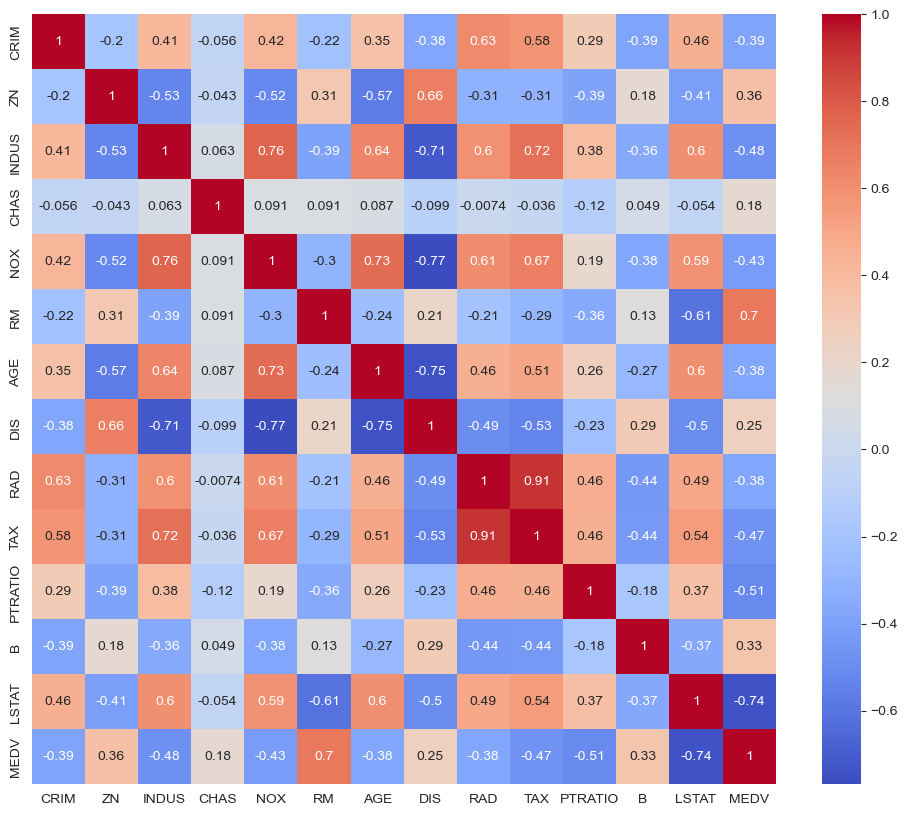

In [12]:
# Visualizamos la correlacion entre las caracteristicas:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Finalmente, genera un mapa de calor de las correlaciones entre las características. Esto puede ayudarnos a entender qué características están más relacionadas entre sí.


### Preparación de los datos para el entrenamiento del modelo:

### Para este paso, dividiremos los datos en características (o variables independientes) y objetivos (o variables dependientes). Luego, dividiremos estos conjuntos en datos de entrenamiento y datos de prueba.

In [13]:
from sklearn.model_selection import train_test_split

# definimos las caracteristicas y el objetivo

X = df.drop('MEDV', axis=1) # Usamos todas las columnas excepto MEDV
y = df['MEDV'] # Usamos la columna MEDV como objetivo

# Dividimos los datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Aquí, estamos utilizando la función train_test_split de la biblioteca sklearn para dividir los datos. El argumento test_size=0.2 significa que queremos que el 20% de los datos se utilice para la prueba, mientras que el resto se utilizará para el entrenamiento. El random_state es simplemente una semilla para el generador de números aleatorios utilizado para la partición de los datos.

### Entrenar el modelo de regresión lineal:

### Usaremos la biblioteca de aprendizaje automático de Python, scikit-learn, para entrenar nuestro modelo.

In [14]:
from sklearn.linear_model import LinearRegression

# Creamos el modelo de regresión lineal

modelo = LinearRegression()

# Entrenamos el modelo usando los datos de entrenamiento

modelo.fit(X_train, y_train)

LinearRegression()

### Primero importamos la clase LinearRegression de scikit-learn. Luego, creamos una instancia de esta clase (esto es nuestro modelo). Finalmente, utilizamos el método fit de nuestro modelo para entrenarlo utilizando nuestros datos de entrenamiento.
### El método fit ajusta el modelo lineal a nuestros datos de entrenamiento. Utiliza los datos de las características X_train y las etiquetas correspondientes y_train para aprender los parámetros del modelo que minimizan el error de predicción.



### Ahora es el momento de usar este modelo para hacer predicciones y evaluar su rendimiento.

In [17]:
# Predicción del modelo y evaluación

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Hacemos las predicciones usando los datos de prueba

y_pred = modelo.predict(X_test)

# Evaluamos el rendimiento del modelo

print('Error cuadrático medio: %.2f' % mean_squared_error(y_test, y_pred))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, y_pred))

Error cuadrático medio: 24.29
Coeficiente de determinación: 0.67


### Primero usamos el método predict de nuestro modelo para hacer predicciones en nuestro conjunto de prueba. Luego, calculamos el error cuadrático medio (RMSE), que es una métrica común para evaluar modelos de regresión. RMSE mide la cantidad promedio que nuestras predicciones se desvían del valor real.

###  La interpretación de las métricas que obtuvimos es la siguiente:

### Error cuadrático medio (RMSE): Esta es la medida de cuánto se desvían nuestras predicciones del valor real. Un RMSE de 24.29 significa que, en promedio, nuestras predicciones se desvían del valor real por 24.29. En el contexto del problema, esto dependerá del rango de los valores de los costos de los incidentes de seguridad. Si la mayoría de los costos se encuentran, por ejemplo, entre 0 y 100, un RMSE de 24.29 es bastante alto. Sin embargo, si los costos se encuentran en el rango de miles o decenas de miles, un RMSE de 24.29 puede ser aceptable.

### Coeficiente de determinación (R²): Esta métrica proporciona una medida de cuánto de la variabilidad en la variable dependiente puede ser explicada por el modelo. Un R² de 0.67 significa que nuestro modelo puede explicar el 67% de la variabilidad en el costo de los incidentes de seguridad. En general, cuanto más cercano esté R² a 1, mejor será el modelo.

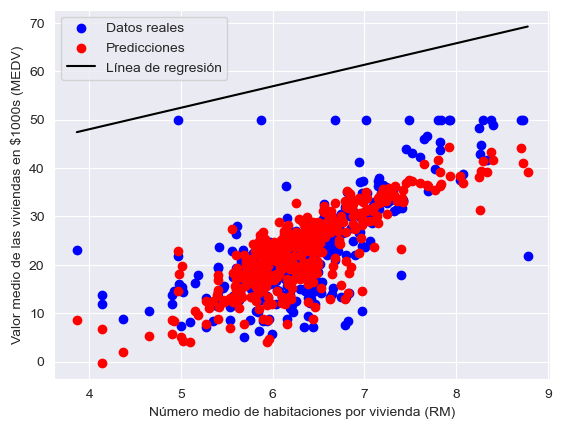

In [20]:
### Visualización de los resultados:

# Hacer predicciones de entrenamiento
y_train_pred = modelo.predict(X_train)

# Graficar las predicciones de entrenamiento
plt.scatter(X_train['RM'], y_train, color='blue', label='Datos reales')
plt.scatter(X_train['RM'], y_train_pred, color='red', label='Predicciones')

# Para la línea de regresión, necesitaremos crear una línea que represente las predicciones del modelo
rm = np.linspace(min(X_train['RM']), max(X_train['RM']), 100)
line = modelo.intercept_ + modelo.coef_[5] * rm  # Suponiendo que 'RM' es la sexta característica

plt.plot(rm, line, color='black', label='Línea de regresión')
plt.xlabel('Número medio de habitaciones por vivienda (RM)')
plt.ylabel('Valor medio de las viviendas en $1000s (MEDV)')
plt.legend()
plt.show()

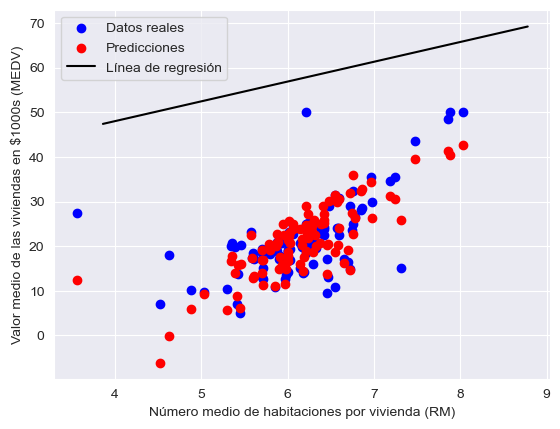

In [21]:
# Hacer predicciones de prueba

y_test_pred = modelo.predict(X_test)

# Graficar las predicciones de prueba

plt.scatter(X_test['RM'], y_test, color='blue', label='Datos reales')
plt.scatter(X_test['RM'], y_test_pred, color='red', label='Predicciones')
plt.plot(rm, line, color='black', label='Línea de regresión')
plt.xlabel('Número medio de habitaciones por vivienda (RM)')
plt.ylabel('Valor medio de las viviendas en $1000s (MEDV)')
plt.legend()
plt.show()

In [23]:
# Guardar el modelo

import pickle

with open('modelo.pkl', 'wb') as archivo_salida:
    pickle.dump(modelo, archivo_salida)